In [2]:
import pandas as pd
from matplotlib import pyplot as plt

facility = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/raw/06_30_2020_tank_facility_data_for_WH102_and_WL146.csv')

controller = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/raw/06_30_2020_tank_controller_data_for_WH102_and_WL146.csv')

gateway = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/raw/06_30_2020_tank_gateway_data_for_WH102_and_WL146.csv')

facility.head()

,TankID,SystemName,TankSerial,TankStatusName,CreatedOn,ModifiedOn,TankGeometry,TankVolume,TankArea,TankHeight,...,OwnerDomainName,ZIPCode,SoldTo,ShipTo,SalesTerritory,SBU,SalesOrg,SAPCustomerID,SystemID,SystemSource
0,10768,"System 1, Sump 2",911804,Online,2013-09-03 13:04:00,2018-02-16 09:01:00,Cube,120.0,NaN,42.200001,...,aaron.miles@ecolab.com,53007,500064354,500064354,WL14616,FB,1001,NaN,9655,NaN
1,7467,BF3,905149,Online,2012-10-17 10:39:00,2017-01-19 10:57:00,Cube,30.0,NaN,17.879999,...,bmtannehill@ecolab.com,19703,1052792,2153365,WH10208,chemical,1001,NaN,20450,NaN
2,1282,Scrubber - TLA,17491,Online,2009-11-08 09:50:00,2016-05-23 17:47:00,Cube,385.0,NaN,42.200001,...,cathy.hernandez@ecolab.com,53522-9772,1081960,1081960,WL14627,UNASSIGNED,1001,2226635.0,47498,TLA
3,10778,Ammonia Condenser,912988,Online,2013-09-04 06:06:00,2016-06-29 21:37:00,Cube,120.0,NaN,42.200001,...,cathy.hernandez@ecolab.com,54983,150205875,150205875,WL14618,FB,1001,150205875.0,152030,ENV
4,10980,Main Cooling Towers East,911533,Online,2013-09-17 16:23:00,2017-09-15 10:42:00,Cube,120.0,NaN,42.200001,...,aaron.miles@ecolab.com,53105,1024303,1024303,WL14616,MN,1001,NaN,13447,NaN


In [3]:
gateway.head()

,TankID,MeasurementDate,Value
0,1282,2018-05-13,8.129432
1,1282,2018-05-14,7.796567
2,1282,2018-05-15,7.796567
3,1282,2018-05-16,7.685612
4,1282,2018-05-17,24.402829


In [4]:
import copy
def _read_measurement_data(fpath):
    ddf = pd.read_csv(fpath)
    df = ddf.pivot(index="MeasurementDate", columns="TankID")
    df.columns = [x[1] for x in df.columns.values]
    df.index = df.index.astype("M8[ns]")
    return df.fillna(0)

 

def _transform_data(df_resampled: pd.DataFrame):
    """ Resamples the historical data for the tanks being modeled """
    df_differences = copy.copy(df_resampled.diff().fillna(0))
    df_differences[df_differences > 0.5] = 0
    return df_differences


In [5]:
controller_path='C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-controller-subset.csv'
gateway_path = 'C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-gateway-subset.csv'
CT = _read_measurement_data(controller_path)
GT = _read_measurement_data(gateway_path)    
CT_tank_ids = CT.columns
CT_resampled = CT.resample("D").mean().interpolate()
CT_features = _transform_data(CT_resampled)

GT_tank_ids = GT.columns
GT_resampled = GT.resample("D").mean().interpolate()
GT_features = _transform_data(GT_resampled)

#predict day to day usage or daily cumu 
#df_features.cumsum() for total usage


In [6]:
CT_features.head()

,30850,30851,30852,34507,34508,38357,40281,40283,40284,40886,...,387131,387175,387183,387309,387310,387311,516817,517921,544779,544783
MeasurementDate,,,,,,,,,,,,,,,,,,,,,
2018-05-13,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-14,-0.604951,0.0,-0.257007,-0.014966,-0.120801,-3.793365,0.000876,0.040475,0.017719,-0.024549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-15,-0.636381,0.0,-0.128210,0.045898,-0.134615,-3.080986,-0.047409,-0.054970,0.078318,-0.280685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-16,-0.753414,0.0,-0.241139,0.011361,0.021208,-0.403627,-0.083224,-0.110889,-0.023876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-17,-0.500199,0.0,-0.012531,-0.176145,-0.145665,-2.882608,-0.056290,-0.177955,0.010246,-0.843561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


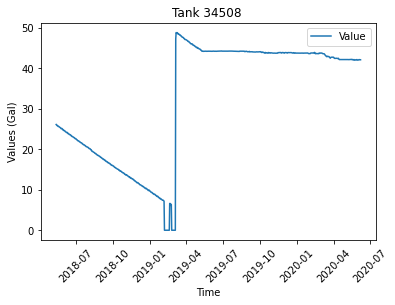

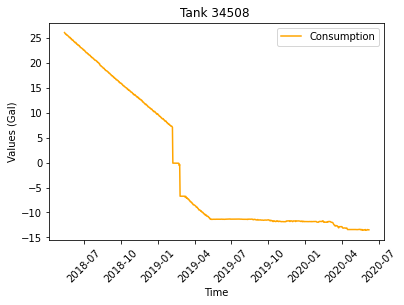

In [12]:
plt.plot(CT[34508],label = "Value")
plt.title('Tank 34508 ')
plt.xlabel('Time')
plt.ylabel('Values (Gal)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.plot(CT_features[34508].cumsum() + CT[34508].iloc[1], label = "Consumption" ,color='orange')
plt.title('Tank 34508 ')
plt.xlabel('Time')
plt.ylabel('Values (Gal)')
plt.xticks(rotation=45)
plt.legend()
plt.show()
#plt.plot(GT[1282].diff().fillna(0)>2)

In [8]:
print(GT_features[5271].tail())


MeasurementDate
2020-06-04    -0.063087
2020-06-05    -0.023973
2020-06-06     0.009673
2020-06-07    -0.029020
2020-06-08   -78.374119
Freq: D, Name: 5271, dtype: float64


In [70]:
GT_features = GT_features.iloc[:-1, :]
# probably caused by timezones

In [72]:
CT.to_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/interim/07-08-20-controller.csv')
CT_features.to_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/interim/07-08-20-controller_features.csv')
GT.to_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/interim/07-08-20-gateway.csv')
GT_features.to_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/interim/07-08-20-gateway_features.csv')

In [71]:
CT_features.tail()

,30850,30851,30852,34507,34508,38357,40281,40283,40284,40886,...,387131,387175,387183,387309,387310,387311,516817,517921,544779,544783
MeasurementDate,,,,,,,,,,,,,,,,,,,,,
2020-06-03,-0.432186,-0.325669,0.0,-0.041815,0.060282,-2.430321,0.084310,-0.152657,-1.241468,0.000000,...,0.0,0.0,0.0,0.0,-0.394354,-0.435211,-0.283437,-3.095012,-0.215623,0.066314
2020-06-04,-0.491761,-0.424855,0.0,0.099545,0.017779,-2.985989,-0.114659,-0.349190,0.130533,0.000000,...,0.0,0.0,0.0,0.0,0.473021,0.272943,-0.366529,-2.842195,-0.212637,-0.059470
2020-06-05,-0.666317,-0.480253,0.0,0.032736,-0.068054,-1.466377,0.023355,-0.106510,0.000000,0.000000,...,0.0,0.0,0.0,0.0,-0.052357,-0.204143,-0.391205,-2.971340,-0.318573,-0.131420
2020-06-06,-0.641610,-0.392329,0.0,-0.006909,0.001616,-4.695012,-0.004363,-0.183889,-0.210075,0.000000,...,0.0,0.0,0.0,0.0,-0.498764,-0.414637,-0.315143,-2.457324,-0.283254,-0.011921
2020-06-07,-0.558777,-0.147684,0.0,0.023750,0.013536,-2.747880,-0.015232,-0.173689,-0.107634,-1.811516,...,0.0,0.0,0.0,0.0,-0.476921,-0.248996,-0.389514,-1.781725,-0.334166,-0.006064


##### smooth the inventory trends

In [ ]:
from scipy.signal import savgol_filter
p = 3
tank_id = 375760
plt.figure(figsize=(15, 7))
temp = df_example[tank_id][np.abs(df_example[tank_id].diff() - df_example[tank_id].diff().mean()) < 10*df_example[tank_id].diff().std()]
temp2 = df_example[tank_id][np.abs(df_example[tank_id].diff() - df_example[tank_id].diff().mean()) < 0.2*df_example[tank_id].diff().std()]
plt.scatter(temp.index.values.astype('M8[D]'), temp.values)
plt.scatter(temp2.index.values.astype('M8[D]'), temp2.values)
plt.plot(temp2.dropna().index.values.astype('M8[D]'), savgol_filter(temp2.dropna().values, p, 1), color='r')
plt.plot(df_example[tank_id].index.values.astype('M8[D]'), df_example[tank_id])